# Variáveis aleatórias

In [1]:
# importando numpy
import numpy as np

In [2]:
# Exemplo muito simples:
# gerando amostras de tamanho n uma v.a. contínua com valores no intervalo (0,1) e com densidade f(x)=2x
# Valor teórico: E(X) = 2/3 =  0.66666...

n = 10
# usando o método da acumulada inversa de Stan Ulam para gerar a amostra (veremos este método mais a frente)
np.random.seed(41)
x = np.sqrt(np.random.uniform(size=10))
print(" media da primeira amostra de tamanho 10: ", np.mean(x))
# outra amostra
x = np.sqrt(np.random.uniform(size=10))
print(" media da segunda amostra de tamanho 10: ", np.mean(x))

 media da primeira amostra de tamanho 10:  0.5724652491335662
 media da segunda amostra de tamanho 10:  0.5955420940958442


In [3]:
# aumentando tamanho da amostra para n=100
x1 = np.sqrt(np.random.uniform(size=100))
print(" media da primeira amostra de tamanho 100: ", np.mean(x1))
# outra amostra
x2 = np.sqrt(np.random.uniform(size=100))
print(" media da segunda amostra de tamanho 100: ", np.mean(x2))

 media da primeira amostra de tamanho 100:  0.6580747740090558
 media da segunda amostra de tamanho 100:  0.6634369387206351


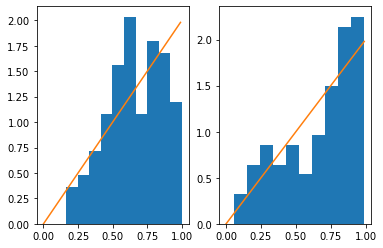

In [4]:
import matplotlib.pyplot as plt
grid = np.arange(0, 1, 0.01)

plt.subplot(121) # array 1 x 2 de subplots, vamos desenhar no plot 1
plt.hist(x1, density = True);
plt.plot(grid, 2*grid);
plt.subplot(122)
plt.hist(x2, density = True);
plt.plot(grid, 2*grid);
plt.show()

In [5]:
# aumentando tamanho da amostra para n=3000
x1 = np.sqrt(np.random.uniform(size=3000))
print(" media da primeira amostra de tamanho 3000: ", np.mean(x1))
# outra amostra
x2 = np.sqrt(np.random.uniform(size=3000))
print(" media da segunda amostra de tamanho 3000: ", np.mean(x2))

 media da primeira amostra de tamanho 3000:  0.663600272164174
 media da segunda amostra de tamanho 3000:  0.6675051492597331


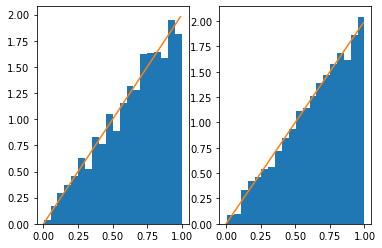

In [6]:
plt.subplot(121) # array 1 x 2 de subplots, vamos desenhar no plot 1
plt.hist(x1, density = True, bins=20);
plt.plot(grid, 2*grid);
plt.subplot(122)
plt.hist(x2, density = True, bins=20);
plt.plot(grid, 2*grid);
plt.show()

# Variáveis aleatórias com scipy

In [7]:
# scipy.stats é um pacote com muitas ferramentas para análise estatística
# Em particular, ele possui muitas distribuições para variáveis aleatórias discretas e contínuas.

# importando o pacote stats de scipy
import scipy.stats as stats

dist_continu = [d for d in dir(stats) if 
                isinstance(getattr(stats, d), stats.rv_continuous)]
print(dist_continu)

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semicircular', 'skewnorm', 't', 'trapz', 'tr

In [ ]:
# Os principais métodos para VAs contínuas são: 
#
# rvs: Random Variates
# pdf: Probability Density Function
# cdf: Cumulative Distribution Function
# ppf: Percent Point Function (Inverse of CDF)
# stats: Return mean, variance, skewness, or kurtosis

## Distribuição uniforme 

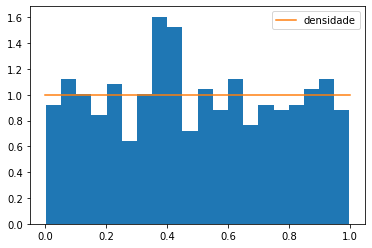

In [40]:
# Por exemplo, a uniforme U(0,1)
amostra = stats.uniform.rvs(size=500)         # amostra aleatória de U(0,1)
plt.hist(amostra, density = True, bins=20);   # histograma dos dados da amostra (com área total = 1)
x = np.linspace(0, 1, 200)                             # grid regular de valores no intervalo (0,1)
plt.plot(x, stats.uniform.pdf(x), label="densidade");  # plot da densidade da U(0,1) no pontos do grid
plt.legend();

In [41]:
# Algumas probabilidades com a U(0,1)

print("P(X <= 0.75) = ", stats.uniform.cdf(0.75)) 
print("P(X >= 0.75) = P(X > 0.75) = 1 - P(X <= 0.75) = ", 1 - stats.uniform.cdf(0.75)) 
print("P(0.20 <= X <= 0.75) = ", stats.uniform.cdf(0.75) - stats.uniform.cdf(0.25)) 

m = stats.uniform.stats(moments='m')   # Obtendo o valor teórico E(X) 
print("E(X) = ", m)

# Médias aritméticas de amostras tem um valor próximo mas não igual a E(X)
print("Media aritmetica de 1a amostra com 100 elementos:", np.mean(stats.uniform.rvs(100)))
print("Media de 2a amostra:", np.mean(stats.uniform.rvs(100)))

P(X <= 0.75) =  0.75
P(X >= 0.75) = P(X > 0.75) = 1 - P(X <= 0.75) =  0.25
P(0.20 <= X <= 0.75) =  0.5
E(X) =  0.5
Media aritmetica de 1a amostra com 100 elementos: 100.3339338589838
Media de 2a amostra: 100.5043485843447


In [37]:
# Uma distribuição uniforme mais genérica: U(a, b) = U(loc, loc+scale)
print(stats.uniform.rvs(size=10, loc=30, scale=5)) 

[32.94195201 34.41666671 31.43128454 33.88754912 31.15702345 34.71080036
 31.21690435 30.59418414 33.89746524 34.93532891]


## Voltar aos slides neste ponto 

## Distribuição gaussiana ou normal N($\mu, \sigma^2$)

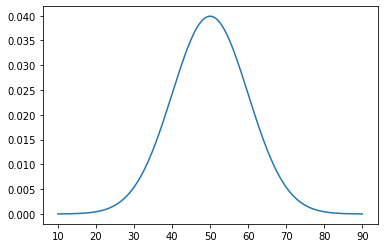

In [43]:
# A distribuição gaussiana é conhecida como "norm"
# A N(mu, sigma^2) pode ser especificada usando os parâmetros loc=mu e scale=sigma 
# (note que, no scipy, nós usamos **sigma** (desvio-padrão) como parâmetro. 
# Não usamos o tradicional sigma^2 = variância)

# Seja X uma v.a. com distribuicao N(mu=50, sigma^2 = 10^2)
# plot da sua função densidade f(x)
x = np.linspace(10, 90, 200)
plt.plot(x, stats.norm.pdf(x, loc=50, scale=10));

In [44]:
# Gerando 7 valores aleatórios de uma N(mu=50, sigma^2 = 10^2)

amostra = stats.norm.rvs(size=7, loc=50, scale=10) 
print(amostra)

[32.13464123 56.72462875 69.58143985 40.24316148 56.4644707  54.24825177
 51.09052882]


In [52]:
# Veja que a média aritmética da amostra **não é** igual ao valor esperado E(X)=50
# Obtendo o valor teórico E(X) 
m = stats.norm.stats(moments='m', loc=50, scale=10)    
print("Valor esperado da N(50, 10^2) é E(X) = ", m)

print("média aritmética de amostra é igual a :", np.mean(amostra), ", diferente de E(X).")
# Média aritmética de uma SEGUNDA amostra da MESMA distribuição, com o mesmo E(X)=50
amostra2 = stats.norm.rvs(size=7, loc=50, scale=10) 
print("Media de 2a amostra:", np.mean(amostra2), "diferente da anterior e também de E(X).")

Valor esperado da N(50, 10^2) é E(X) =  50.0
média aritmética de amostra é igual a : 51.49816037044064 , diferente de E(X).
Media de 2a amostra: 49.65320750172545 diferente da anterior e também de E(X).


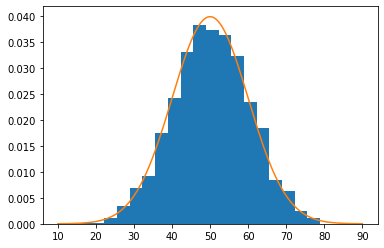

In [14]:
# Gerando n=2000 valores aleatórios de uma N(mu=50, sigma^2 = 10^2)
# histograma com sobreposição da função densidade: são parecidos.

amostra = stats.norm.rvs(size=2000, loc=50, scale=10) 
plt.hist(amostra, density = True, bins=20);
x = np.linspace(10, 90, 200)
plt.plot(x, stats.norm.pdf(x, loc=50, scale=10));

In [20]:
# Obtenha P(X <= 65)
p1 = stats.norm.cdf(65, loc=50, scale=10)
print("P(X <= 65) = ", p1)

# Obtenha P(X > 65) 
# Mas isto é apenas 1 - P(X <= 65)
print("P(X > 65) = ", 1-p1)

# Obtenha P(45 < X < 65) 
# É igual a P(X < 65) - P(X < 45)
p2 = stats.norm.cdf(65, loc=50, scale=10) - stats.norm.cdf(45, loc=50, scale=10)
print("P(45 < X < 65) = ", p2)

# Obs: no caso de v.a.'s contínuas, P(X <= 65) = P(X < 65) + P(X=65) = P(X < 65) + 0 
# Isto é, P(X = 65) = 0

P(X <= 65) =  0.9331927987311419
P(X > 65) =  0.06680720126885809
P(45 < X < 65) =  0.624655260005155


Eu gosto de passar explicitamente os parâmetros size, loc e scale.

Se os uso implicitamente, às vezes, o que eu acho que estou passando como size pode ser interpretado como loc. 

In [27]:
# Podemos vetorizar estas operações passando os parâmetros como vetores

# Por exemplo, vamos calcular o valor da densidade da N(50, 10^2) em 5 pontos 
x = [30, 40, 50, 60, 70]
d1 = stats.norm.cdf(x, loc=50, scale=10)
print("densidade da N(0,1) em ", x, " é igual a ", d1)

# Podemos vetorizar o parâmetro loc também
mu = [48, 49, 50, 51, 52]
d2 = stats.norm.cdf(x, loc=mu, scale=10)
print("densidade da N(mu,1) em ", x, " é igual a ", d2, " com mu=", mu)

# Vetorizando o parâmetro scale também
sigma = [12, 11, 10, 11, 12]
d3 = stats.norm.cdf(x, loc=mu, scale=sigma)
print("densidade da N(mu,sigma^2) em ", x, " é igual a ", d3)
print("Usamos mu=", mu, " e sigma=", sigma)

densidade da N(0,1) em  [30, 40, 50, 60, 70]  é igual a  [0.02275013 0.15865525 0.5        0.84134475 0.97724987]
densidade da N(mu,1) em  [30, 40, 50, 60, 70]  é igual a  [0.03593032 0.18406013 0.5        0.81593987 0.96406968]  com mu= [48, 49, 50, 51, 52]
densidade da N(mu,sigma^2) em  [30, 40, 50, 60, 70]  é igual a  [0.0668072  0.20662669 0.5        0.79337331 0.9331928 ]
Usamos mu= [48, 49, 50, 51, 52]  e sigma= [12, 11, 10, 11, 12]


In [55]:
# Gerando 5 valores aleatórios de uma N(mu, sigma^2 = 10^2) com mu variando

x = stats.norm.rvs(size=5, loc=[-10, -5, 0, 5, 10], scale=1) 
print(x)

[-10.80776308  -5.44934353   0.05412437   4.75930147  10.21896477]


In [30]:
# Ao chamar a função rvs para gerar números aleatórios uma segunda vez, os números gerados serão diferentes da 
# primeira geração. 
print("Primeira amostra = ", stats.norm.rvs(size=5))
print("Segunda amostra = ", stats.norm.rvs(size=5))

Primeira amostra =  [-0.66464149  0.55641924  0.72051335 -0.18769995  0.42404559]
Segunda amostra =  [-0.10178074 -1.70823872  0.1195981  -1.17676251  0.43637665]


In [33]:
# Os valores sucessivos gerados podem ser considerados independentes, 
# sem que um valor gerado possa ser usado para predizer o próximo.

# Para que você possa repetir exatamente a mesma análise ou para garantir que outras pessoas gerem os mesmos 
# números aleatórios, devemos fixar explicitamente a semente a ser usada pelo python.

from numpy.random import default_rng
rng = default_rng(123)
print("Primeira amostra = ", stats.norm.rvs(size=5, random_state=rng))
rng = default_rng(123)
print("Segunda amostra = ", stats.norm.rvs(size=5, random_state=rng))

Primeira amostra =  [-0.98912135 -0.36778665  1.28792526  0.19397442  0.9202309 ]
Segunda amostra =  [-0.98912135 -0.36778665  1.28792526  0.19397442  0.9202309 ]


## Variância, desvio-padrão e função de distribuição acumulada

Voltar aos slides neste ponto e retornar mais tarde. 

In [23]:
# Outra operação importante é ppf: Percent Point Function (Inverse of CDF)
# Dada uma probabilidade, tal como 0.23, ela retorna o valor x tala que P(X <= x) = 0.23

print("Valor x tal que P(N(50, 10^2) <= x) = 0.23 é: ", stats.norm.ppf(0.23, loc=50, scale=10)) 

Valor x tal que P(N(50, 10^2) <= x) = 0.23 é:  42.61153150814786


In [ ]:
# todas distribuições possuem funções de help
print(stats.norm.__doc__)

In [35]:
# Outras distribuições contínuas

x = stats.expon.rvs(size=500, loc=5, scale=3)
print("Primeira amostra = ", x)


Primeira amostra =  [10.68925062  7.14077921  5.1037734   6.27413413  5.90861196  7.3993105
  6.43053806  8.47597217  6.05105815  8.67791324  6.07596416  6.10605047
  5.47769598  7.02763825  5.1053202   8.3966334  10.52448456  8.47109964
  6.17256391  6.730462    8.7946476   6.69947357  6.30695051  5.2042113
  7.5928735   5.23528546  7.49020655  7.43114519  5.59584635  5.3059702
  6.28360554  8.45215176  7.92174541  7.04784736  6.37085685  6.47478215
  5.79904596  8.29937663  8.20292412  6.20274379  5.79454812  7.31544961
  8.28904067  5.70281487  6.62200878  5.47611899  6.70617303  6.03269703
  6.26359783 12.60518557]


In [ ]:
dist_discrete = [d for d in dir(stats) if 
                 isinstance(getattr(stats, d), stats.rv_discrete)]
print(dist_discrete)

In [ ]:
print("V(X) = ", v)                 
print("DP(X) = ", np.sqrt(v))

In [ ]:
# Ajustar os dados a uma distribuição
# Usa o método de máxima verossimilhança 

